# <a name="0.0"></a>Содержание:
* [Описание проекта](#0.)
    - [Описание данных](#0.1.)
* [Шаг 1. Открываем файл и изучаем общую информацию](#1.)
    - [Импорт библиотек](#1.1.)
    - [Изучаем общую информацию](#1.2.)
    - [Вывод](#1.3.)
* [Шаг 2. Подготавливаем данные](#2.)
    - [Приводим данные к нужным типам](#2.1.)
    - [Исправляем ошибки в данных](#2.2.)
    - [Выполняем дополнительные расчёты](#2.3.)
    - [Вывод](#2.4.)
* [Шаг 3. Анализируем данные](#3.)
    - [Вывод](#3.1.)
* [Шаг 4. Проверка гипотез](#4.)
    - [Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#4.1.)
    - [Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#4.2.)
* [Шаг 5. Общие выводы](#5.)

<a name="0."></a>
## Описание проекта
Имеются данные о работе оператора сотовой связи. Клиентам предалагают два тарифных плана: 
- Смарт
- Ультра<br>
Чтобы скорректировать рекламный бюджет, следует проанализировать, какой тариф приносит больше денег. Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Исходный набор представляет собой данные 500 пользователей оператора. Необходимо проанализировать поведение клиентов и делать вывод - какой тариф лучше
### Описание тарифов
#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей
#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="0.1."></a>
### Описание данных
#### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя
- reg_date — дата подключения тарифа (D.M.Y)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовует)
- city — город проживания пользователя
- tariff — название тарифного плана
#### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
#### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
#### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
#### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="1."></a>
# Шаг 1. Открываем файл и изучаем общую информацию
<font size="2">([к содержанию](#0.0))</font>

<a name="1.1."></a>
## Импорт библиотек

<font size="2">([к содержанию](#0.0))</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_columns=30

In [3]:
# Загружаем данные
calls=pd.read_csv('./datasets/calls.csv')
internet=pd.read_csv('./datasets/internet.csv')
messages=pd.read_csv('./datasets/messages.csv')
tariffs=pd.read_csv('./datasets/tariffs.csv')
users=pd.read_csv('./datasets/users.csv')

<a name="1.2."></a>
## Изучаем общую информацию

<font size="2">([к содержанию](#0.0))</font>

In [4]:
# Посмотрим пару строк и изучим общую информацию
calls.head()

# id — уникальный номер звонка
# call_date — дата звонка
# duration — длительность звонка в минутах
# user_id — идентификатор пользователя, сделавшего звонок

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
internet.head()

# id — уникальный номер сессии
# mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
# session_date — дата интернет-сессии
# user_id — идентификатор пользователя

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
messages.head()

# id — уникальный номер сообщения
# message_date — дата сообщения
# user_id — идентификатор пользователя, отправившего сообщение

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
tariffs.head()

# tariff_name — название тарифа
# rub_monthly_fee — ежемесячная абонентская плата в рублях
# minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
# messages_included — количество сообщений в месяц, включённых в абонентскую плату
# mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
# rub_per_minute — стоимость минуты разговора сверх тарифного пакета
# rub_per_message — стоимость отправки сообщения сверх тарифного пакета
# rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users.head()

# user_id — уникальный идентификатор пользователя
# first_name — имя пользователя
# last_name — фамилия пользователя
# age — возраст пользователя (годы)
# reg_date — дата подключения тарифа (день, месяц, год)
# churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
# city — город проживания пользователя
# tariff — название тарифного плана

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
users['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<a name="1.3."></a>
## Вывод
Исходные данные представляют собой 5 отдельных таблиц. Целевой таблицей является users, которая включает в себя 500 пользователей. Отметим, что в текущей выборке присутствует 38 пользователей, которые отказались от своих тарифов, что можно понять из таблицы users по полю churn_date.<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2."></a>
# Шаг 2. Подготавливаем данные

<font size="2">([к содержанию](#0.0))</font>

<a name="2.1."></a>
## Приводим данные к нужным типам

<font size="2">([к содержанию](#0.0))</font>

In [14]:
# Приводим данные к нужным типам
# Весь анализ мы осуществляем по месяцам, поэтому во временных столбцах оставим только номер месяца
calls['call_date'] = pd.DatetimeIndex(
    pd.to_datetime(calls['call_date'], format='%Y-%m-%d')).month
internet['session_date'] = pd.DatetimeIndex(
    pd.to_datetime(internet['session_date'], format='%Y-%m-%d')).month
messages['message_date'] = pd.DatetimeIndex(
    pd.to_datetime(messages['message_date'], format='%Y-%m-%d')).month
users['reg_date'] = pd.DatetimeIndex(
    pd.to_datetime(users['reg_date'], format='%Y-%m-%d')).month
users['churn_date'] = pd.DatetimeIndex(
    pd.to_datetime(users['churn_date'], format='%Y-%m-%d')).month

In [15]:
# Убираем лишний столбец
try:
    del internet['Unnamed: 0']
    print('Удалил')
except:
    print('Удалять нечего')

Удалил


In [16]:
internet.sort_values(by='mb_used')

,id,mb_used,session_date,user_id
116616,1393_102,0.00,6,1393
53410,1179_272,0.00,8,1179
104303,1353_239,0.00,10,1353
19438,1065_583,0.00,3,1065
19437,1065_582,0.00,7,1065
...,...,...,...,...
140299,1471_182,1623.92,7,1471
103480,1348_138,1651.25,10,1348
7063,1024_118,1651.55,11,1024
119156,1402_191,1702.75,10,1402


In [17]:
calls.sort_values(by='duration')

,id,call_date,duration,user_id
0,1000_0,7,0.00,1000
57375,1145_206,7,0.00,1145
57380,1145_211,9,0.00,1145
57381,1145_212,4,0.00,1145
157627,1391_108,11,0.00,1391
...,...,...,...,...
60889,1153_135,11,35.95,1153
39777,1099_150,8,36.12,1099
5865,1017_61,11,36.47,1017
178737,1446_22,11,37.35,1446


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     500 non-null    int64  
 1   age         500 non-null    int64  
 2   churn_date  38 non-null     float64
 3   city        500 non-null    object 
 4   first_name  500 non-null    object 
 5   last_name   500 non-null    object 
 6   reg_date    500 non-null    int64  
 7   tariff      500 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB


<a name="2.2."></a>
## Исправляем ошибки в данных

<font size="2">([к содержанию](#0.0))</font>

<div class="alert alert-success">
Исходные данные, содержащие информацию о том, как пользователи используют тарифы, имели пустые значения (таблицы calls и internet со столбцами duration и mb_used соответственно). Было выдвинуто предположение, что данные строки являются ошибочно заполнеными нулями в силу того, что продолжительность данных подключений была очень маленькая (например, 15 с и 0.1 мб или меньше). Чтобы выделить данные значения в отдельную группу (недознов и случайный доступ в интернет соответственно) и использовать их для анализа, они были приведены к значениям 0.01.
</div>

In [19]:
calls.loc[calls['duration'] == 0,'duration'] = 0.01
internet.loc[internet['mb_used'] == 0 , 'mb_used'] = 0.01

<AxesSubplot:>

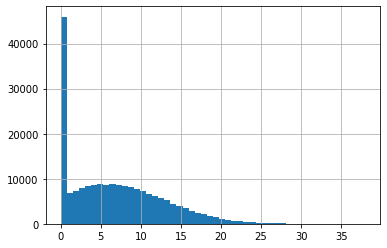

In [20]:
calls['duration'].hist(bins=50)

In [21]:
# Выполняем условие: оператор всегда округляет вверх значения минут и мегабайтов. 
# Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
calls['duration'] = np.ceil(calls['duration'])

In [22]:
calls

,id,call_date,duration,user_id
0,1000_0,7,1.0,1000
1,1000_1,8,1.0,1000
2,1000_2,6,3.0,1000
3,1000_3,9,14.0,1000
4,1000_4,12,6.0,1000
...,...,...,...,...
202602,1499_215,12,1.0,1499
202603,1499_216,10,19.0,1499
202604,1499_217,11,11.0,1499
202605,1499_218,10,5.0,1499


In [23]:
# Формируем единую таблицу
data = pd.merge(pd.merge(calls,internet, how='outer', left_on='id', 
                         right_on='id',suffixes=('_calls','_internet')),
                         messages, how='outer', left_on='id', 
                         right_on='id',suffixes=('','_messages'))
data

,id,call_date,duration,user_id_calls,mb_used,session_date,user_id_internet,message_date,user_id
0,1000_0,7.0,1.0,1000.0,112.95,11.0,1000.0,6.0,1000.0
1,1000_1,8.0,1.0,1000.0,1052.81,9.0,1000.0,10.0,1000.0
2,1000_2,6.0,3.0,1000.0,1197.26,6.0,1000.0,8.0,1000.0
3,1000_3,9.0,14.0,1000.0,550.27,8.0,1000.0,6.0,1000.0
4,1000_4,12.0,6.0,1000.0,302.56,9.0,1000.0,12.0,1000.0
...,...,...,...,...,...,...,...,...,...
237274,1488_179,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1488.0
237275,1488_180,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1488.0
237276,1488_181,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1488.0
237277,1488_182,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1488.0


In [24]:
# Удалим лишние столбцы
try:
    del data["user_id_calls"]
    del data['user_id_internet']
    del data['user_id']
except:
    print('Удалять нечего')

In [25]:
# Функция для выделения id
def find_id(row):
    result=row['id'].split('_')
    return result[0]

In [26]:
data['id'] = data.apply(find_id, axis=1).astype('int')
data

,id,call_date,duration,mb_used,session_date,message_date
0,1000,7.0,1.0,112.95,11.0,6.0
1,1000,8.0,1.0,1052.81,9.0,10.0
2,1000,6.0,3.0,1197.26,6.0,8.0
3,1000,9.0,14.0,550.27,8.0,6.0
4,1000,12.0,6.0,302.56,9.0,12.0
...,...,...,...,...,...,...
237274,1488,NaN,NaN,NaN,NaN,12.0
237275,1488,NaN,NaN,NaN,NaN,11.0
237276,1488,NaN,NaN,NaN,NaN,11.0
237277,1488,NaN,NaN,NaN,NaN,12.0


In [27]:
# Добавляем оставшиеся данные
data = pd.merge(pd.merge(data,users, how='left', left_on='id', right_on='user_id'),
                tariffs, how='left', left_on="tariff", right_on='tariff_name')

In [28]:
# Удалим повторяющиеся столбцы
try:
    del data['user_id']
    del data['tariff_name']
except:
    print('Удалять нечего')
data

,id,call_date,duration,mb_used,session_date,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,7.0,1.0,112.95,11.0,6.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
1,1000,8.0,1.0,1052.81,9.0,10.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
2,1000,6.0,3.0,1197.26,6.0,8.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
3,1000,9.0,14.0,550.27,8.0,6.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
4,1000,12.0,6.0,302.56,9.0,12.0,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237274,1488,NaN,NaN,NaN,NaN,12.0,47,NaN,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237275,1488,NaN,NaN,NaN,NaN,11.0,47,NaN,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237276,1488,NaN,NaN,NaN,NaN,11.0,47,NaN,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237277,1488,NaN,NaN,NaN,NaN,12.0,47,NaN,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3


In [29]:
# Заполняем пустые ячейки
data.fillna(0, inplace=True)
data

,id,call_date,duration,mb_used,session_date,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,7.0,1.0,112.95,11.0,6.0,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
1,1000,8.0,1.0,1052.81,9.0,10.0,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
2,1000,6.0,3.0,1197.26,6.0,8.0,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
3,1000,9.0,14.0,550.27,8.0,6.0,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
4,1000,12.0,6.0,302.56,9.0,12.0,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237274,1488,0.0,0.0,0.00,0.0,12.0,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237275,1488,0.0,0.0,0.00,0.0,11.0,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237276,1488,0.0,0.0,0.00,0.0,11.0,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237277,1488,0.0,0.0,0.00,0.0,12.0,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3


In [30]:
data['call_date'] = data['call_date'].astype('int')
data['session_date'] = data['session_date'].astype('int')
data['message_date'] = data['message_date'].astype('int')
data['age'] = data['age'].astype('int')
data['reg_date'] = data['reg_date'].astype('int')
data

,id,call_date,duration,mb_used,session_date,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,7,1.0,112.95,11,6,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
1,1000,8,1.0,1052.81,9,10,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
2,1000,6,3.0,1197.26,6,8,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
3,1000,9,14.0,550.27,8,6,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
4,1000,12,6.0,302.56,9,12,52,0.0,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237274,1488,0,0.0,0.00,0,12,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237275,1488,0,0.0,0.00,0,11,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237276,1488,0,0.0,0.00,0,11,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3
237277,1488,0,0.0,0.00,0,12,47,0.0,Новороссийск,Вадим,Филатов,11,smart,50,15360,500,550,200,3,3


<a name="2.3."></a>
## Выполняем дополнительные расчёты
Для каждого пользователя вычисляем
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).<br>
<font size="2">([к содержанию](#0.0))</font>

In [31]:
# Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам
group_data_for_call = data.pivot_table(index=['id','call_date'], 
                                     values='duration', aggfunc=['sum','count'])
# Объединять таблицы по многомерным индексам неудобно
group_data_for_call.reset_index(inplace=True)

group_data_for_call.columns = ['user','month','total duration of calls','number of calls']

# Дропаем пустые строки
group_data_for_call=group_data_for_call.query('month!=0')

group_data_for_call

,user,month,total duration of calls,number of calls
1,1000,5,164.0,22
2,1000,6,187.0,43
3,1000,7,346.0,47
4,1000,8,418.0,52
5,1000,9,478.0,58
...,...,...,...,...
3381,1498,10,258.0,41
3382,1499,9,71.0,9
3383,1499,10,473.0,68
3384,1499,11,624.0,74


In [32]:
# количество отправленных сообщений по месяцам (можно брать любой столбец)
group_data_for_messages=data.pivot_table(index=['id', 'message_date'], 
                                         values='age', aggfunc=['count'])

# Объединять таблицы по многомерным индексам неудобно
group_data_for_messages.reset_index(inplace=True)

group_data_for_messages.columns=['user','month','number of messages']

# Дропаем пустые строки
group_data_for_messages=group_data_for_messages.query('month!=0')

group_data_for_messages

,user,month,number of messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
3117,1498,10,42
3119,1499,9,11
3120,1499,10,48
3121,1499,11,59


In [33]:
# Объем израсходованного интернет-трафика по месяцам
group_data_for_internet=data.pivot_table(index=['id','session_date'], 
                                     values='mb_used', aggfunc=['sum'])

# Объединять таблицы по многомерным индексам неудобно
group_data_for_internet.reset_index(inplace=True)

group_data_for_internet.columns = ['user','month','total internet traffic']

# Дропаем пустые строки
group_data_for_internet = group_data_for_internet.query('month!=0')

group_data_for_internet

,user,month,total internet traffic
1,1000,5,2253.50
2,1000,6,23233.82
3,1000,7,14003.65
4,1000,8,14055.95
5,1000,9,14568.93
...,...,...,...
3572,1498,10,20579.46
3574,1499,9,1845.76
3575,1499,10,17788.66
3576,1499,11,17963.41


In [34]:
# Объединим весь анализ в одну таблицу
group_data=pd.merge(pd.merge(group_data_for_call,group_data_for_messages, how='outer', 
                             left_on=['user', 'month'], right_on=['user', 'month']),
                    group_data_for_internet, left_on=['user', 'month'], right_on=['user', 'month'])

group_data=group_data.sort_values(by='user')
group_data

,user,month,total duration of calls,number of calls,number of messages,total internet traffic
0,1000,5,164.0,22.0,22.0,2253.50
1,1000,6,187.0,43.0,60.0,23233.82
2,1000,7,346.0,47.0,75.0,14003.65
3,1000,8,418.0,52.0,81.0,14055.95
4,1000,9,478.0,58.0,57.0,14568.93
...,...,...,...,...,...,...
3156,1498,8,414.0,57.0,62.0,24235.30
3159,1499,9,71.0,9.0,11.0,1845.76
3160,1499,10,473.0,68.0,48.0,17788.66
3161,1499,11,624.0,74.0,59.0,17963.41


In [35]:
# Вычисляем помесячную выручку с каждого пользователя
grouped_data_with_tariff = pd.merge(pd.merge(group_data, users, left_on='user', how='left', right_on='user_id'),
                                    tariffs, how='left', left_on='tariff', right_on = 'tariff_name')
grouped_data_with_tariff

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,164.0,22.0,22.0,2253.50,1000,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,187.0,43.0,60.0,23233.82,1000,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,346.0,47.0,75.0,14003.65,1000,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,418.0,52.0,81.0,14055.95,1000,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,478.0,58.0,57.0,14568.93,1000,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,1498,8,414.0,57.0,62.0,24235.30,1498,68,10.0,Владикавказ,Всеволод,Акимчин,7,smart,50,15360,500,550,200,3,3,smart
3198,1499,9,71.0,9.0,11.0,1845.76,1499,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3,smart
3199,1499,10,473.0,68.0,48.0,17788.66,1499,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3,smart
3200,1499,11,624.0,74.0,59.0,17963.41,1499,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3,smart


In [36]:
#Удалим повторяющиеся столбцы
try:
    del grouped_data_with_tariff['user_id']
    del grouped_data_with_tariff['tariff_name']
except:
    print('Удалять нечего')
grouped_data_with_tariff

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2253.50,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23233.82,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14003.65,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14055.95,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14568.93,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,1498,8,414.0,57.0,62.0,24235.30,68,10.0,Владикавказ,Всеволод,Акимчин,7,smart,50,15360,500,550,200,3,3
3198,1499,9,71.0,9.0,11.0,1845.76,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3
3199,1499,10,473.0,68.0,48.0,17788.66,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3
3200,1499,11,624.0,74.0,59.0,17963.41,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3


In [37]:
# Чтобы избежать возможной ошибки, связанной с ситуацией,
# когда клиент не использовал весь объём бесплатного трафика
def calculate_revenue(row):
    #Абонентская плата
    revenue = row['rub_monthly_fee']
    
    #Превышение тарифа по инету
    internet = row['total internet traffic'] - row['mb_per_month_included']
    if internet > 0:
        revenue += math.ceil(internet/1024) * row['rub_per_gb']
    
    #Превышение тарифа по сообщениям
    messages = row['number of messages'] - row['messages_included']
    if messages > 0:
        revenue += messages * row['rub_per_message']
    
    #Превышение тарифа по звонкам
    calls = row['total duration of calls'] - row['minutes_included']
    if calls > 0:
        revenue += calls*row['rub_per_minute']
    return revenue

In [38]:
grouped_data_with_tariff['revenue'] = grouped_data_with_tariff.apply(calculate_revenue, axis=1)
grouped_data_with_tariff

,user,month,total duration of calls,number of calls,number of messages,total internet traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,164.0,22.0,22.0,2253.50,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,187.0,43.0,60.0,23233.82,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,346.0,47.0,75.0,14003.65,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,418.0,52.0,81.0,14055.95,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,478.0,58.0,57.0,14568.93,52,NaN,Краснодар,Рафаил,Верещагин,5,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,1498,8,414.0,57.0,62.0,24235.30,68,10.0,Владикавказ,Всеволод,Акимчин,7,smart,50,15360,500,550,200,3,3,2386.0
3198,1499,9,71.0,9.0,11.0,1845.76,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3,550.0
3199,1499,10,473.0,68.0,48.0,17788.66,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3,1150.0
3200,1499,11,624.0,74.0,59.0,17963.41,35,NaN,Пермь,Гектор,Корнилов,9,smart,50,15360,500,550,200,3,3,1549.0


<a name="2.4."></a>
## Вывод
В столбцах duration и mb_used в соответствующих таблицах присутствуют нулевые значения, может это очень коротки звонки меньше 10 секунд или сброс, но в биллинг их также нужно включать, поэтому заменяем их на небольшие значения для дальнейщего анализа. После объединения таблиц по пользователям у нас появились пустые значения. Пропущенные значения заполнили 0. Таким образом, нулевой месяц и нулевая продолжительность сигнализируют о том, что раньше в ячейке был NaN.<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="3."></a>
# Шаг 3. Анализируем данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.<br>
<font size="2">([к содержанию](#0.0))</font>

In [39]:
data_for_parse = grouped_data_with_tariff.pivot_table(index=['tariff','month'], 
                                                      values=['number of messages', 
                                                              'total duration of calls', 
                                                              'total internet traffic',
                                                              'revenue'],
                                                      aggfunc=['mean'])
statistics = grouped_data_with_tariff.pivot_table(index=['tariff'],
                                                  values=['number of messages',
                                                          'total duration of calls',
                                                          'total internet traffic',
                                                          'revenue' ],
                       aggfunc=['mean', np.var, np.std])
data_for_parse

mean                                       \
             number of messages      revenue total duration of calls   
tariff month                                                           
smart  1              20.000000   723.352941              209.647059   
       2              27.940000   835.051724              306.310345   
       3              35.550725  1178.571429              400.532468   
       4              35.864583   974.875000              377.000000   
       5              39.032787  1210.595745              398.404255   
       6              38.577465  1218.048780              409.196319   
       7              38.988506  1240.502488              419.288557   
       8              38.935961  1340.978632              436.695279   
       9              39.219731  1267.576923              441.779923   
       10             39.082677  1382.710884              439.791809   
       11             39.881481  1363.199367              449.041270   
       12             42.264808  1600.697329              492.880952   
ultra  1              43.428571  1950.000000              440.888889   
       2              37.285714  1977.272727              323.500000   
       3              47.800000  2014.864865              503.081081   
       4              44.512821  2002.777778              487.811321   
       5              49.313725  2061.363636              554.619048   
       6              52.530303  2040.361446              514.025000   
       7              62.486111  2120.000000              582.988506   
       8              59.103448  2084.433962              547.666667   
       9              63.627660  2025.000000              576.736364   
       10             70.117647  2066.803279              599.470085   
       11             66.491071  2093.233083              579.625000   
       12             72.293103  2140.217391              634.631579   

                                     
             total internet traffic  
tariff month                         
smart  1                8513.759118  
       2               11597.113793  
       3               15104.232597  
       4               13462.246607  
       5               15805.259858  
       6               15794.724756  
       7               15743.229204  
       8               16681.786795  
       9               16303.659692  
       10              16757.205782  
       11              16895.780949  
       12              18113.751958  
ultra  1               13140.692222  
       2               12846.492273  
       3               17535.565676  
       4               17129.952037  
       5               19656.554394  
       6               19152.967711  
       7               20723.414222  
       8               19760.752736  
       9               19372.754211  
       10              20209.660164  
       11              19935.603759  
       12              21951.115217

In [40]:
statistics

mean                                       \
       number of messages      revenue total duration of calls   
tariff                                                           
smart           38.736075  1307.378815              430.781278   
ultra           61.587261  2071.509240              563.629118   

                                             var                 \
       total internet traffic number of messages        revenue   
tariff                                                            
smart            16215.741845         717.226661  684944.385397   
ultra            19688.152053        2119.699327  142951.573912   

                                                                     std  \
       total duration of calls total internet traffic number of messages   
tariff                                                                     
smart             37529.632463           3.436021e+07          26.781088   
ultra             98871.139960           9.858921e+07          46.040193   

                                                                   
           revenue total duration of calls total internet traffic  
tariff                                                             
smart   827.613669              193.725663            5861.758350  
ultra   378.089373              314.437816            9929.209858

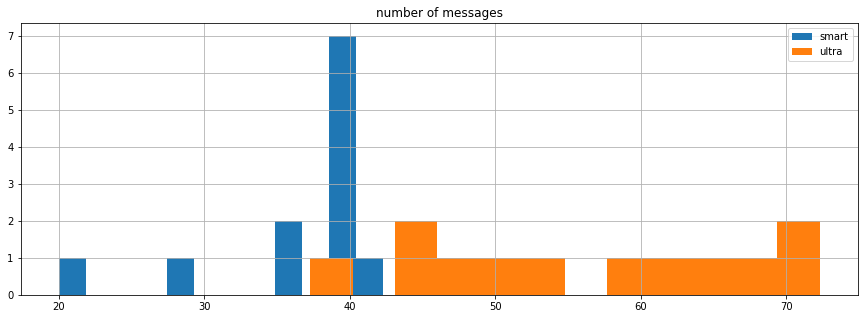

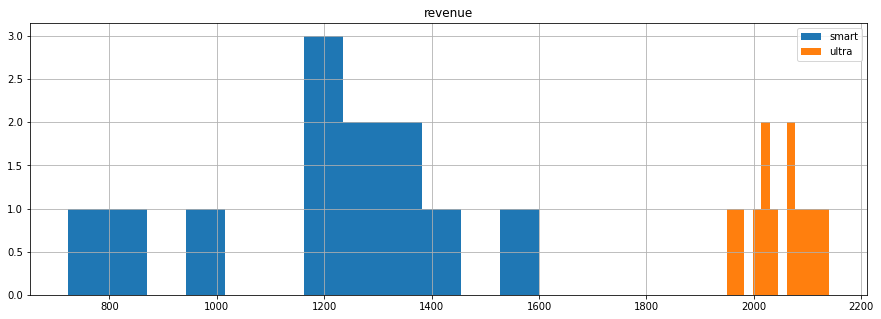

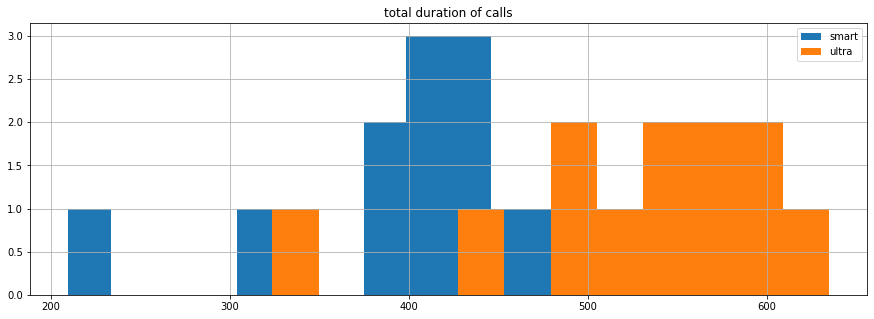

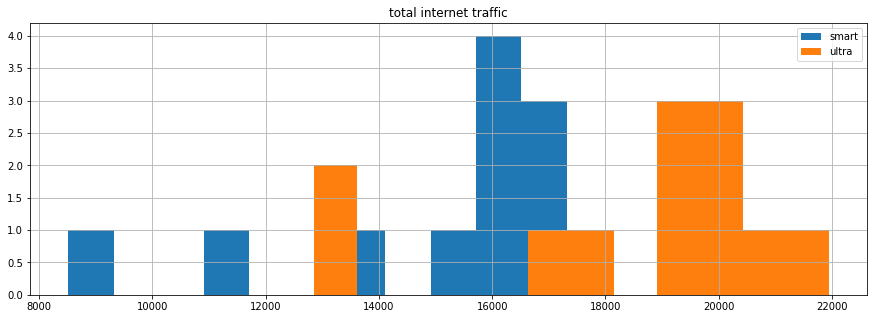

In [41]:
bins = 12
for column in data_for_parse.columns:
    plt.title(column[1])
    data_for_parse.loc['smart'][column[0]][column[1]].hist(bins=bins, figsize=(15,5), label='smart')
    data_for_parse.loc['ultra'][column[0]][column[1]].hist(bins=bins, figsize=(15,5), label='ultra')
    plt.legend()
    plt.show()

In [42]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


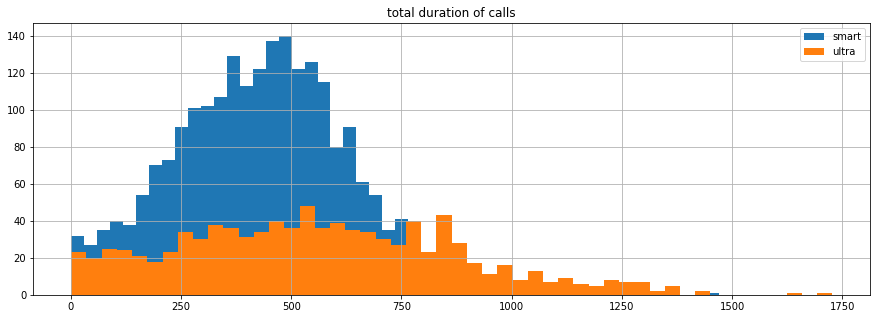

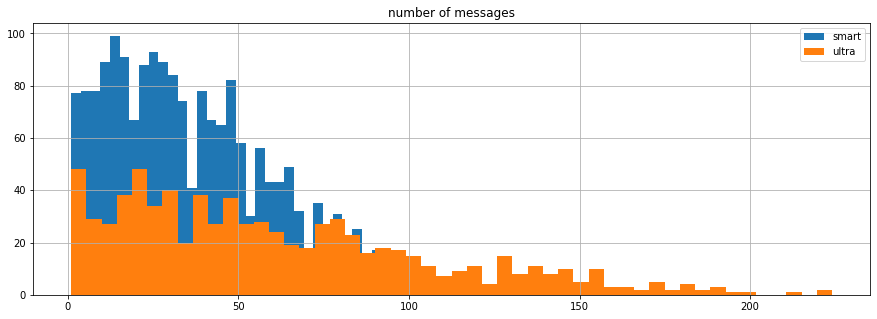

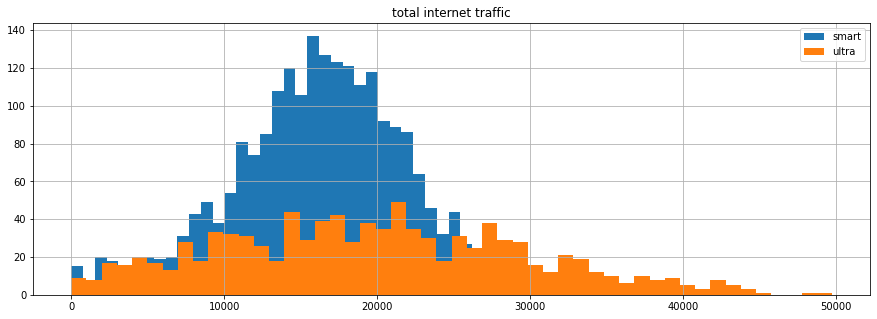

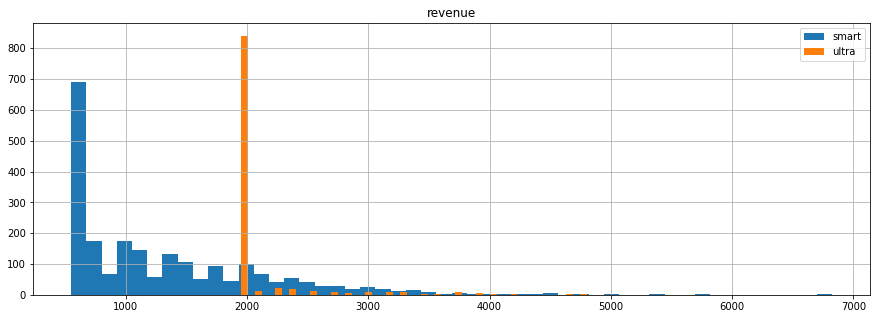

In [43]:
# Пример
bins = 50
for column in ['total duration of calls', 'number of messages', 'total internet traffic', 'revenue']:
    plt.title(column)
    grouped_data_with_tariff.query("tariff == 'smart'").loc[:, column].hist(bins=bins, figsize=(15,5), label='smart')
    grouped_data_with_tariff.query("tariff == 'ultra'").loc[:, column].hist(bins=bins, figsize=(15,5), label='ultra')
    plt.legend()
    plt.show() 

<a name="3.1."></a>
## Вывод
На основании полученных данных можно сделать следующие выводы:
- Количество сообщений - для пользователей тарифа смарт, данные смещены вправо, медианное значение расположены на 38 как и ожидалось. Если исходить из того, что допустимое количество сообщений для тарифа смарт составляет 50, то можно сказать, что большинство пользователей стрямятся не переплачивать по количеству отправленных сообщений (или им больше не нужно). Для тарифа ultra ситуация иная. Распределение имеет максимумы в точке 45 и 70. Если исходить из рассчитанного по среднего, то оно находится посередени между рассчитанными значениями. Для тарифа ultra также наблюдается высокая дисперсия по количеству сообщений (в 2 раза выше, чем у smart) 
- total duration of calls - для тарифа смарт гистограмма также напомимает нормальное распредление со смещением вправо (длинной головой, датасет скошен влево), и пользователи также продолжают оставаться в установленных тарифом рамках. Гистограмма по тарифу ultra аналогичная
- total internet traffic - ситуация для тарифа сматр не изменилась. Для тарифа ultra наблюдается больщой скачок между средним значением и минимальным, что характеризует тот факт, что интернет трафиком в диапазоне от 14 гб до 16 гб в месяц пользуется малое количество пользователей. Чаще используется или 13 или 20.
- Выручка от пользователей тарифа ultra выше по медиани и меньше по дисперсии.<br>

<font size="2">([к содержанию](#0.0))</font>

<a name="4."></a>
# Шаг 4. Проверка гипотез
<font size="2">([к содержанию](#0.0))</font>

<a name="4.1."></a>
## Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
<font size="2">([к содержанию](#0.0))</font>

In [44]:
alpha = .05 # критический уровень статистической значимости

ultra=grouped_data_with_tariff.query('tariff=="ultra"')['revenue']
smart=grouped_data_with_tariff.query('tariff=="smart"')['revenue']

results = st.ttest_ind(
    ultra, 
    smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средняя выручка пользователей тарифов «Ультра» и «Смарт» различны")
else:
    print("Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы")

p-значение: 1.9789705935491704e-150
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различны


<a name="4.2."></a>
## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
<font size="2">([к содержанию](#0.0))</font>"

In [45]:
alpha = .05 # критический уровень статистической значимости

Moscow=grouped_data_with_tariff.query('city=="Москва"')['revenue']
ne_Moscow=grouped_data_with_tariff.query('city!="Москва"')['revenue']

results = st.ttest_ind(
    Moscow, 
    ne_Moscow)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов")
else:
    print("Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов")

p-значение: 0.5761260422493034
Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов


<a name="5."></a>
# Шаг 5. Общие выводы
Исходные данные представляют собой 5 таблиц, которые включают в себя действия 500 пользователей, пользующихся 2 разными тарифными планами. В исходных данных былы обнаружены следующие ошибки:
- Таблица internet содержала "Unnamed: 0", который дублировал индексы. Данный столбец был удалён
- Исходные данные, содержащие информацию о том, как пользователи используют тарифы, имели пустые значения (таблицы calls и internet со столбцами duration и mb_used соответственно). Было выдвинуто предположение, что данные строки являются ошибочно заполнеными нулями в силу того, что продолжительность данных подключений была очень маленькая (например, 15 с и 0.1 мб). Поэтом, чтобы использовать данные записи в последующем анализе, они были приведены к значениям 0.1.

При анализе распределений по длительности звонков, количеству загруженных мб и отправленных сообщений был сделан вывод о том, что:
- Пользователи тарифа 'ultra' в среднем используют только 62 сообщения из доступных 1000 (причём дисперсия равна 46, что говорит о том, что 99,7% пользователей отправляют в месяц максимум 131 сообщение), разговаривают в среднем 563 минуты (дисперсия равна 314, значит максимум 1034 минуты), что также гораздо меньше, чем им предоставляется (3000 минут). По доступному интернету ситуация для тарифа 'ultra' несколько иная, в среднем пользователи используют только 19 ГБ из 30 доступных и пользователи стараются не выходить за доступный лимит, чтобы не платить больше (95,4% расходуют максимум 29 Гб), однако 2.5% пользователей требуется больше интернета, за который они доплачивают отдельно.
- Для пользователей тарифа 'smart' ситуация несколько иная. Ввиду того, что в установленных пакетом рамках доступных минут, мегабайт интернет трафика и количества сообщений меньше, пользователи чаще доплачивают по биллингу. Например, в среднем пользователи тарифа 'smart' отправляют по 38 сообщений в месяц. Исходя из того, что дисперсия данного распределения равна 26, при установлленном ограничении на 50 сообщений в месяц, большое количество пользователей вынуждено доплачивать за дополнительные сообщения. Ситуация аналогичная и с телефонными разговорами (среднее 430, ограничение 500, дисперсия 93) и интеренетом (среднее 16 гигабайт, ограничение 15 гигабайт, дисперсия 6 гигабайт)

Однако из распределения по выручке видно, что пользователи тарифа ultra тратят на биллинг больше денег, чем пользователи тарифа смарт, так как они переплачивают за включённые звонки и сообщения, которые в итоге не используют

Для ответа на поставленные вопросы мы сформировали 2 выборки из генеральной совокупности: пользователей тарифов 'smart' мы объединили в одну группу, а пользователей тарифа 'ultra' - в другую. Выборки являются независимыми, так как у нас нет пользователей, которыю используют 2 тарифа. Для проверки гипотез мы использовали стандартный t-тест и получили следующие значения p-value:
1. Почти 0 - свидетельствует о том, что вероятность того, что выручки для тарифов одинаковы равна почти 0%. Вероятность получить одинаковые значения по средней выручке между тарифами равна почти 0%. Это говорит о том, что от пользователей с тарифом смарт основная выручка идёт не от абонентской платы (550 против 1950), а от переплат за использование звонков,  сообщений и интернета. Однако основную прибыль компании приносят пользователи тарифа ultra
2. 0.57 - свидетельствует о том, что выручка от пользователей из Москвы и из регионов вероятнее всего одинакова. Об этом также свидетельствуют средние у этих выборок (они одинаковы), хотя дисперсия выручки от пользователей не из Москвы выше, и,  как следствие, некоторые пользователи тратят больше денег на биллинг.

При формировании гипотез мы исходим из обратного отверждения: выручки равны<br>

<font size="2">([к содержанию](#0.0))</font>